In [1]:
import pandas as pd
import pandas_datareader as dr
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from datetime import date, datetime, timedelta
%matplotlib inline
plt.style.use("ggplot")

In [2]:
t = np.array(range(1990,2004))
ingresos = np.array([1202.02, 1262.13, 1232.07, 1382.33, 1322.23, 1352.28, 1346.27, 1370.31, 1479.93, 1553.93, 1538.39, 1523.01, 1561.08, 1607.91])

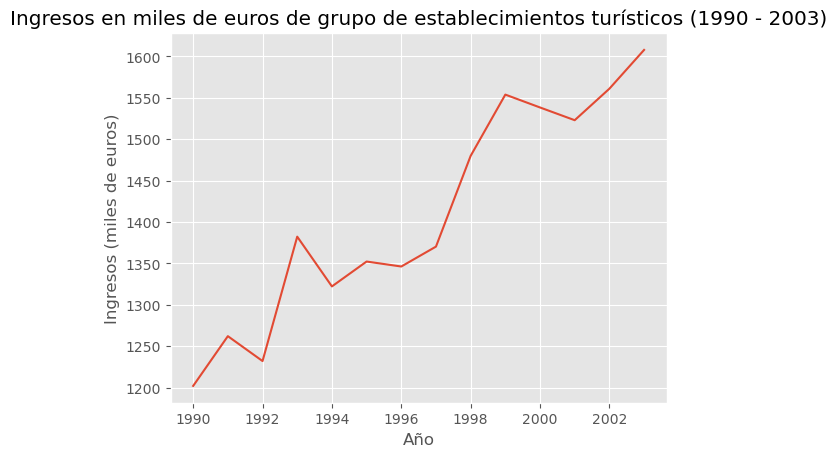

In [3]:
plt.plot(t,ingresos)
plt.title('Ingresos en miles de euros de grupo de establecimientos turísticos (1990 - 2003)')
plt.xlabel('Año')
plt.ylabel('Ingresos (miles de euros)')
plt.show()

In [4]:
# Hacer media móvil para n = 3
n = 3 #cantidad de elementos que se utilizarán para calcular la media móvil
k = len(ingresos)
mmovil = np.empty(k)
mmovil[:] = np.nan
ini = 0

for i in range(n-1,k):
  mmovil[i] = np.sum(ingresos[ini:i+1])/n
  ini += 1
mmovil

array([          nan,           nan, 1232.07333333, 1292.17666667,
       1312.21      , 1352.28      , 1340.26      , 1356.28666667,
       1398.83666667, 1468.05666667, 1524.08333333, 1538.44333333,
       1540.82666667, 1564.        ])

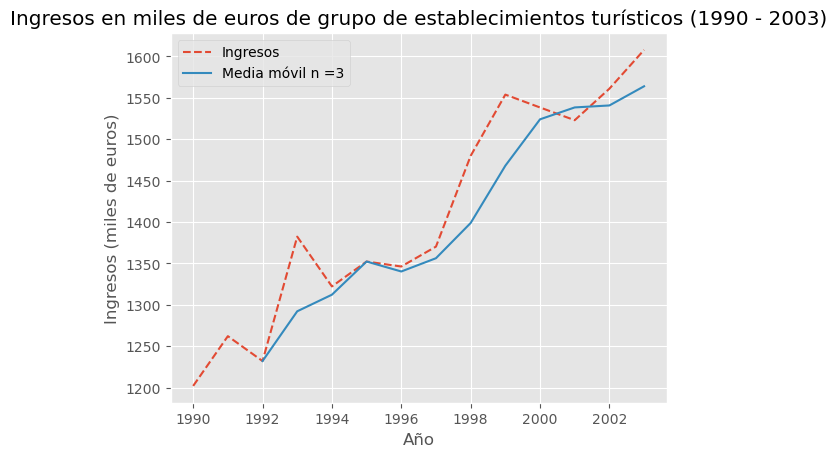

In [5]:
plt.plot(t,ingresos, '--', label='Ingresos')
plt.plot(t,mmovil, label='Media móvil n =3')
plt.title('Ingresos en miles de euros de grupo de establecimientos turísticos (1990 - 2003)')
plt.xlabel('Año')
plt.ylabel('Ingresos (miles de euros)')
plt.legend()
plt.show()

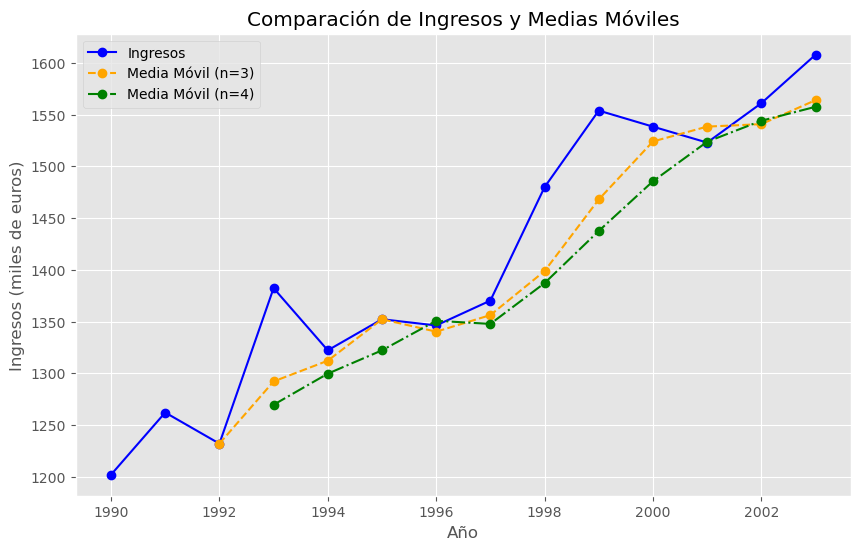

In [6]:
# Definir la función
def calcular_media_movil(serie, n):
    return pd.Series(serie).rolling(window=n).mean().to_numpy()

# Calcular medias móviles
media_3 = calcular_media_movil(ingresos, 3)
media_4 = calcular_media_movil(ingresos, 4)

# Crear gráfico
plt.figure(figsize=(10, 6))
plt.plot(t, ingresos, label='Ingresos', marker='o', linestyle='-', color='blue')
plt.plot(t, media_3, label='Media Móvil (n=3)', marker='o', linestyle='--', color='orange')
plt.plot(t, media_4, label='Media Móvil (n=4)', marker='o', linestyle='-.', color='green')

plt.title('Comparación de Ingresos y Medias Móviles')
plt.xlabel('Año')
plt.ylabel('Ingresos (miles de euros)')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

In [7]:
df_ingresos = pd.DataFrame({'year':t,'ingresos':ingresos})
df_ingresos.set_index('year')
df_ingresos.head()

,year,ingresos
0,1990,1202.02
1,1991,1262.13
2,1992,1232.07
3,1993,1382.33
4,1994,1322.23


In [8]:
df_ingresos['mmovil'] = df_ingresos['ingresos'].rolling(3).mean()
df_ingresos.head()

,year,ingresos,mmovil
0,1990,1202.02,NaN
1,1991,1262.13,NaN
2,1992,1232.07,1232.073333
3,1993,1382.33,1292.176667
4,1994,1322.23,1312.210000


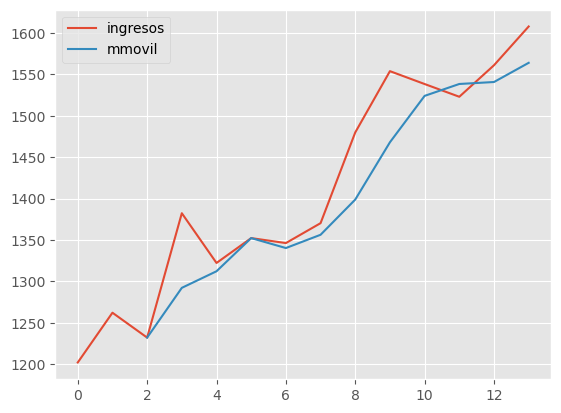

In [9]:
df_ingresos[['ingresos','mmovil']].plot();

In [10]:
est = ingresos - mmovil
est

array([            nan,             nan, -3.33333333e-03,  9.01533333e+01,
        1.00200000e+01,  0.00000000e+00,  6.01000000e+00,  1.40233333e+01,
        8.10933333e+01,  8.58733333e+01,  1.43066667e+01, -1.54333333e+01,
        2.02533333e+01,  4.39100000e+01])

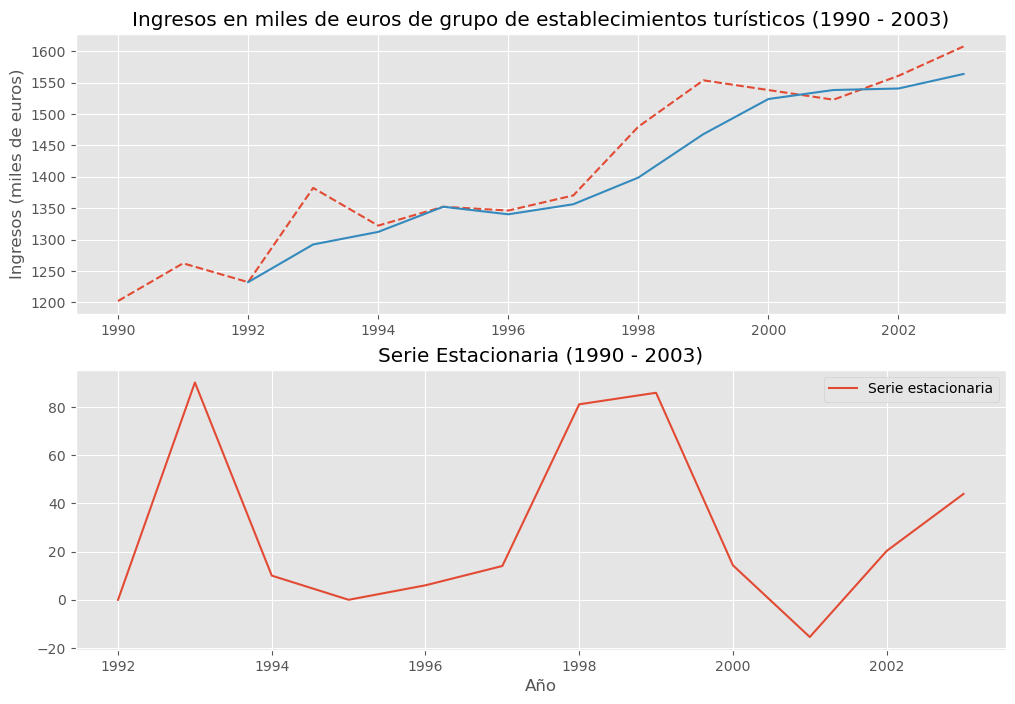

In [11]:
plt.figure(figsize=(12,8))
plt.subplot(211)
plt.plot(t,ingresos, '--', label='Ingresos')
plt.plot(t,mmovil, label='Media móvil n =3')
plt.title('Ingresos en miles de euros de grupo de establecimientos turísticos (1990 - 2003)')
plt.ylabel('Ingresos (miles de euros)')
plt.subplot(212)
plt.plot(t,est, '-',label='Serie estacionaria')
plt.title('Serie Estacionaria (1990 - 2003)')
plt.xlabel('Año')
plt.legend()
plt.show()

In [12]:
!pip install pydataset
from pydataset import data

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/15.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/15.9 MB ? eta -:--:--
     --------------------------------------- 0.0/15.9 MB 129.6 kB/s eta 0:02:03
     --------------------------------------- 0.0/15.9 MB 186.2 kB/s eta 0:01:26
     --------------------------------------- 0.1/15.9 MB 357.2 kB/s eta 0:00:45
     --------------------------------------- 0.2/15.9 MB 794.9 kB/s eta 0:00:20
     - -------------------------------------- 0.4/15.9 MB 1.5 MB/s eta 0:00:11
     - -------------------------------------- 0.6/15.9 MB 1.9 MB/s eta 0:00:08
     - -------------------------------------- 0.7/15.9 MB 2.0 MB/s eta 0:00:08
     -- ------------------------------------- 0.9/15.9 MB 2.3 MB/s eta 0:00:07
     -- ------------------------------------- 1.0/15.9 MB 2.5 MB/s eta 0:00:07
     -- ------------------------------------- 1.0/15.9 MB 2.5 M

In [13]:
 co2 = data('co2')
co2

,time,co2
1,1959.000000,315.42
2,1959.083333,316.31
3,1959.166667,316.50
4,1959.250000,317.56
5,1959.333333,318.13
...,...,...
464,1997.583333,362.57
465,1997.666667,360.24
466,1997.750000,360.83
467,1997.833333,362.49


<Axes: xlabel='time'>

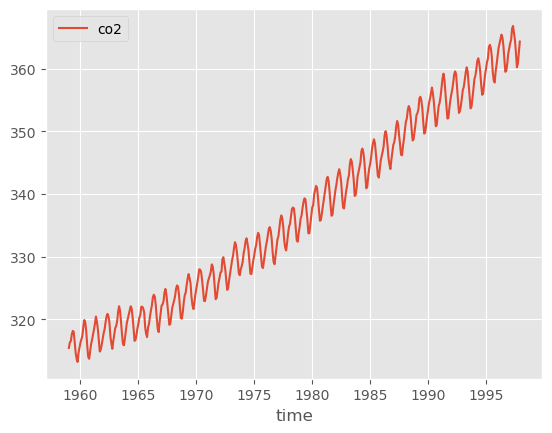

In [14]:
co2.plot(x='time')

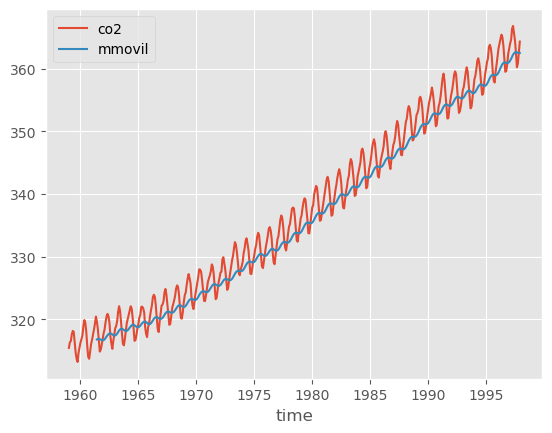

In [15]:
n = 30
co2['mmovil'] = co2['co2'].rolling(n).mean()
co2.plot(x='time');

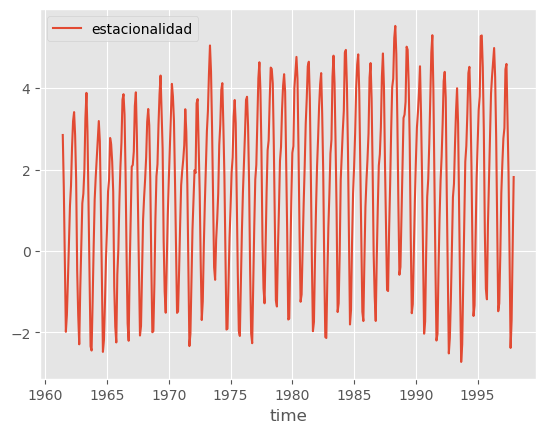

In [16]:
co2['estacionalidad'] = co2['co2'] - co2['mmovil']
co2[['time','estacionalidad']].plot(x='time');

In [17]:
import statsmodels.api as sm
descomposicion = sm.tsa.seasonal_decompose(co2['co2'],model='aditive', period=30)

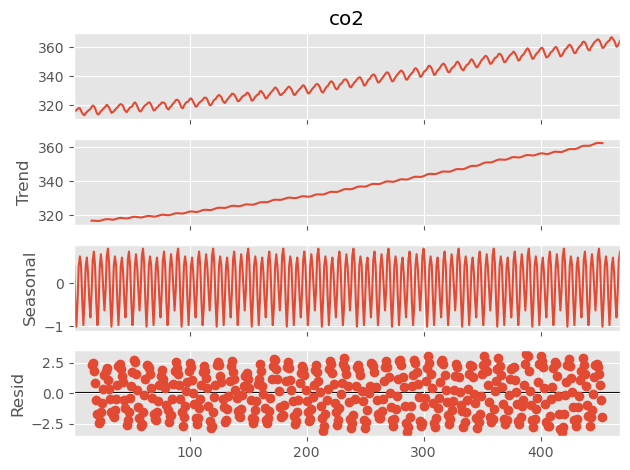

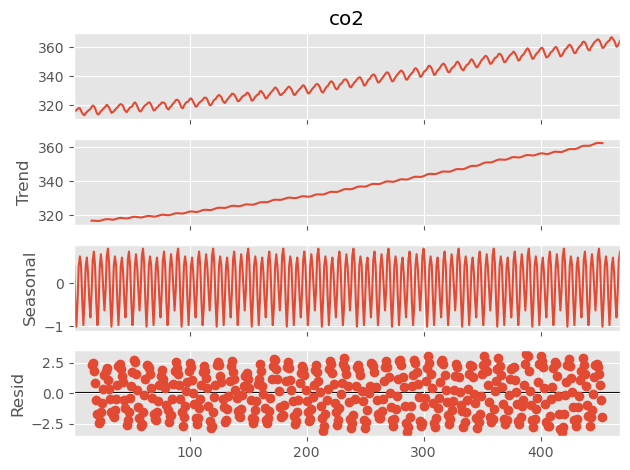

In [18]:
descomposicion.plot()

In [19]:
def get_trimestre(t):
  dt = t - int(t)
  if dt <= 0.25:
    trimestre = 1
  elif dt > 0.25 and dt <= 0.5:
    trimestre = 2
  elif dt > 0.5 and dt <= 0.75:
    trimestre = 3
  else:
    trimestre = 4
  return trimestre

co2 = data('co2')
co2['year'] = co2['time'].apply(lambda t: int(t))
co2['trimestre'] = co2['time'].apply(get_trimestre)
co2_trim = co2[['year','trimestre','co2']].groupby(['year','trimestre'],\
                                        as_index=False).mean()

In [20]:
co2_trim.tail()

,year,trimestre,co2
151,1996,4,360.943333
152,1997,1,363.966667
153,1997,2,366.306667
154,1997,3,362.443333
155,1997,4,362.553333


<Axes: >

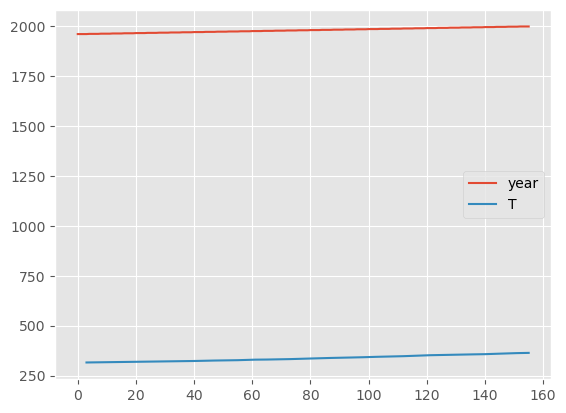

In [21]:
co2_trim["T"] = co2_trim["co2"].rolling(4) .mean()
co2_trim[["year" , "T"]].plot()

<Axes: xlabel='year'>

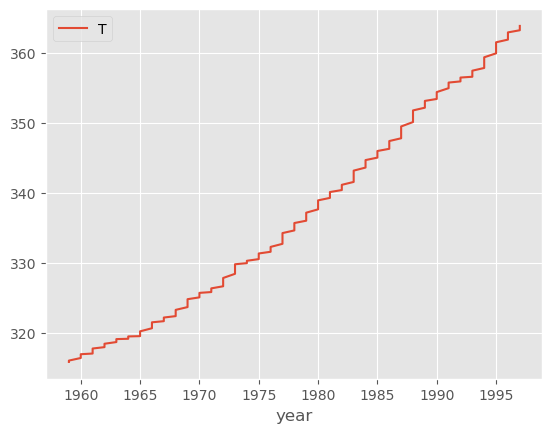

In [22]:
co2_trim["T"] = co2_trim["co2"].rolling(4, center=True) .mean()
co2_trim[["year", "T"]].plot(x="year")

In [23]:
co2["T"] = co2_trim["co2"].rolling(4, center=True).mean()
co2_trim["EA"] = co2_trim["co2"]/co2_trim["T"]

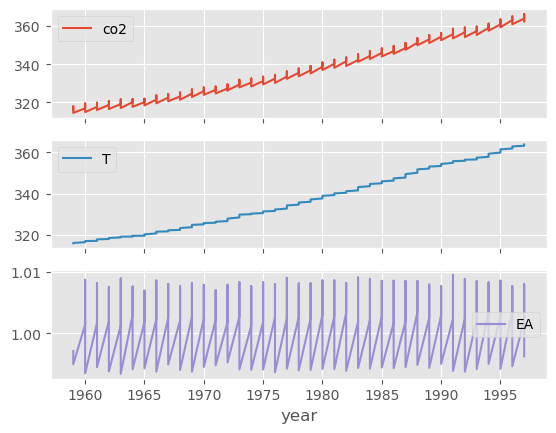

In [24]:
co2_trim[["year", "co2" , "T" , "EA"]].plot(x="year", subplots=True);

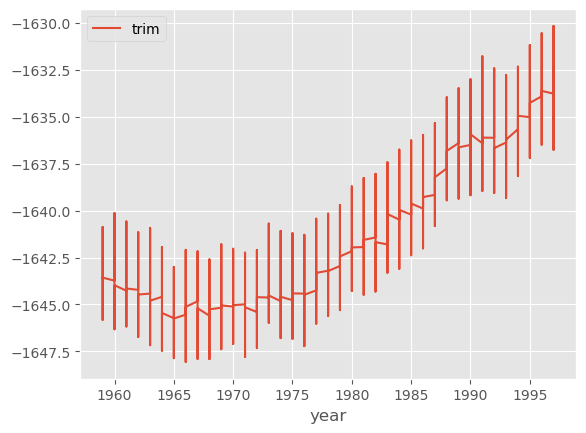

In [25]:
co2['trim'] = co2['co2'] - co2['year']
co2[['year','trim']].plot(x='year');

In [26]:
co2_trim.head(10)

,year,trimestre,co2,T,EA
0,1959,1,316.076667,NaN,NaN
1,1959,2,317.896667,NaN,NaN
2,1959,3,314.906667,315.825833,0.997090
3,1959,4,314.423333,316.015000,0.994963
4,1960,1,316.833333,316.388333,1.001406
5,1960,2,319.390000,316.640833,1.008682
6,1960,3,315.916667,316.747500,0.997377
7,1960,4,314.850000,316.926667,0.993447
8,1961,1,317.550000,317.024167,1.001659
9,1961,2,319.780000,317.201667,1.008128


In [27]:
ibve = co2_trim[["trimestre","EA"]].groupby("trimestre",as_index=False).mean()
ibve

,trimestre,EA
0,1,1.002373
1,2,1.008219
2,3,0.997002
3,4,0.994252


In [28]:
# 1. Cálculo de IBVE e IVE
ibve = co2_trim[['trimestre', 'EA']].groupby('trimestre', as_index=False).mean()
ibve.rename(columns={'EA': 'ibve'}, inplace=True)

# Calcular el promedio de IBVE para normalización
ibve_mean = ibve['ibve'].mean()
ibve['ive'] = ibve['ibve'] / ibve_mean

print("IBVE e IVE:")
print(ibve)

# 2. Función para desestacionalizar la serie
def desestacionar_serie(row, ive):
    trimestre = row['trimestre']  # Trimestre actual
    co2_value = row['co2']        # Valor de CO2 en ese trimestre
    return co2_value / ive[trimestre - 1]

# Aplicar la desestacionalización
co2_trim['desestacional'] = co2_trim.apply(lambda row: desestacionar_serie(row, ibve['ive']), axis=1)

print("\nSerie desestacionalizada:")
print(co2_trim[['year', 'trimestre', 'co2', 'desestacional']])

# 3. Modelo de regresión lineal para predecir el primer trimestre de 1998
y = np.array(co2_trim['desestacional'])
x = np.array(range(len(y)))

# Ajuste del modelo de regresión lineal
regresion = stats.linregress(x, y)
b = regresion.slope  # Pendiente
a = regresion.intercept  # Intercepto

print(f"\nPendiente: {b}")
print(f"Intercepto: {a}")

# Predicción para el primer trimestre de 1998 (posición correspondiente a len(y))
prediccion_1998_T1 = a + b * len(y)
print(f"Predicción para el primer trimestre de 1998: {prediccion_1998_T1}")

# 4. Agregar la serie de regresión al DataFrame
co2_trim['regresion'] = a + b * x

print("\nDataFrame final con regresión:")
print(co2_trim)

IBVE e IVE:
   trimestre      ibve       ive
0          1  1.002373  1.001911
1          2  1.008219  1.007754
2          3  0.997002  0.996542
3          4  0.994252  0.993793

Serie desestacionalizada:
     year  trimestre         co2  desestacional
0    1959          1  316.076667     315.473845
1    1959          2  317.896667     315.450685
2    1959          3  314.906667     315.999476
3    1959          4  314.423333     316.386993
4    1960          1  316.833333     316.229068
5    1960          2  319.390000     316.932528
6    1960          3  315.916667     317.012981
7    1960          4  314.850000     316.816324
8    1961          1  317.550000     316.944368
9    1961          2  319.780000     317.319528
10   1961          3  316.626667     317.725445
11   1961          4  315.983333     317.956735
12   1962          1  318.570000     317.962423
13   1962          2  320.573333     318.106757
14   1962          3  317.603333     318.705501
15   1962          4  316.44

In [29]:
ibve = co2_trim[['trimestre','EA']].groupby('trimestre',as_index=False).mean()
ibve.rename(columns={'EA':'ibve'}, inplace=True)
ibve_mean = ibve['ibve'].mean()
ibve['ive'] = ibve['ibve']/ibve_mean
ibve

,trimestre,ibve,ive
0,1,1.002373,1.001911
1,2,1.008219,1.007754
2,3,0.997002,0.996542
3,4,0.994252,0.993793


In [30]:
def desestacionar_serie(y,ive):
  trim = int(y[0])
  co2 = y[1]
  return co2/ive[trim-1]

In [31]:
co2_trim.columns

Index(['year', 'trimestre', 'co2', 'T', 'EA', 'desestacional', 'regresion'], dtype='object')

In [32]:
y = np.array(co2_trim["desestacional"])
x = np.array(range(0,len(y)))
regresion = stats.linregress(x,y)
b = regresion.slope #y = a + bx
a = regresion.intercept
print(f"pendiente: {b}")
print(f"intercepto: {a}")
yrl = a + b*x
co2_trim["regresion"] = yrl

pendiente: 0.327621479275147
intercepto: 311.6642866583444


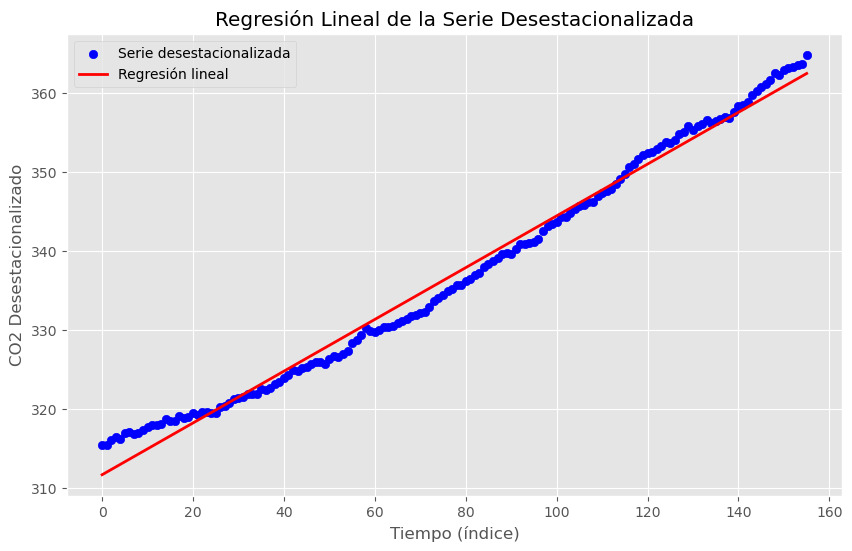

In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Serie desestacionalizada')
plt.plot(x, co2_trim['regresion'], color='red', label='Regresión lineal', linewidth=2)
plt.xlabel('Tiempo (índice)')
plt.ylabel('CO2 Desestacionalizado')
plt.title('Regresión Lineal de la Serie Desestacionalizada')
plt.legend()
plt.grid(True)
plt.show()

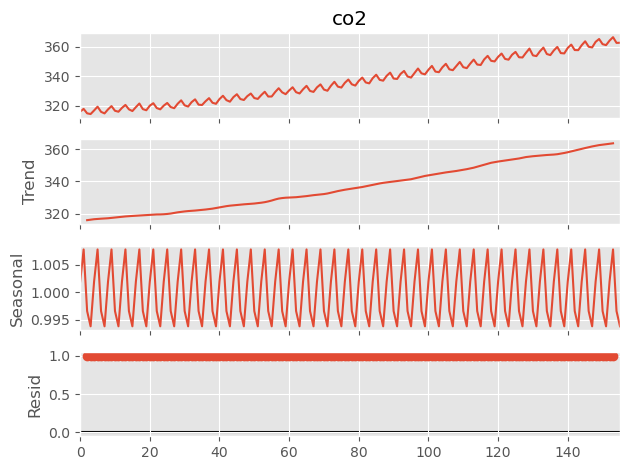

In [34]:
import statsmodels.api as sm
descomposicion = sm.tsa.seasonal_decompose(co2_trim['co2'],model='multiplicative',\
                                           period=4)
descomposicion.plot();

# ARIMA

In [35]:
#!pip install yfinance --upgrade --no-cache-dir
#!pip install pandas-datareader --upgrade --no-cache-dir

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/948.2 kB ? eta -:--:--
     ---- --------------------------------- 112.6/948.2 kB 2.2 MB/s eta 0:00:01
     ------------------ ------------------- 460.8/948.2 kB 4.8 MB/s eta 0:00:01
     --------------------------------- ---- 829.4/948.2 kB 6.6 MB/s eta 0:00:01
     -------------------------------------- 948.2/948.2 kB 6.7 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/102.2 kB ? eta -:--:--
   ---------------------------------------- 102.2/102.2 kB 5.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Defaulting to user installation because normal site-packages is not writeable


In [36]:
import yfinance as yf
import pandas as pd
from datetime import datetime

In [39]:
#dr.data.get_data_yahoo(Activo, start=FechaInicio, end=FechaFinal)
from datetime import date
Activo = 'AAPL'
FechaInicio = '2024-01-01'
FechaFinal = '2024-06-30'
apple = yf.download(Activo, start=FechaInicio, end=FechaFinal)
#apple = dr.data.get_data_yahoo(Activo, start=FechaInicio, end=FechaFinal)
apple.index = apple.index.to_period('D')
apple.head(5)

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2024-01-02,184.734970,185.639999,188.440002,183.889999,187.149994,82488700
2024-01-03,183.351746,184.250000,185.880005,183.429993,184.220001,58414500
2024-01-04,181.023178,181.910004,183.089996,180.880005,182.149994,71983600
2024-01-05,180.296692,181.179993,182.759995,180.169998,181.990005,62303300
2024-01-08,184.655365,185.559998,185.600006,181.500000,182.089996,59144500


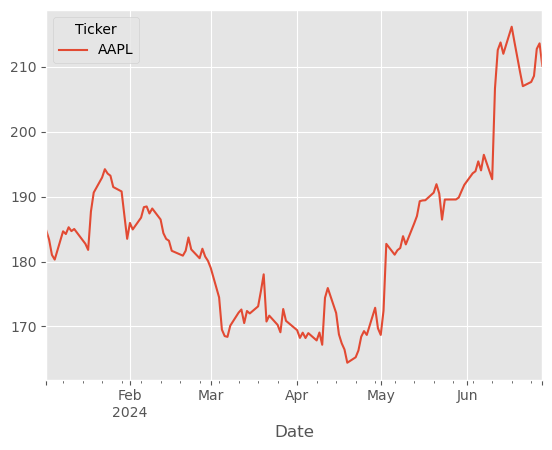

In [40]:
apple['Adj Close'].plot();

In [41]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: trend. After release 0.14, this will raise.
  warnings.warn(


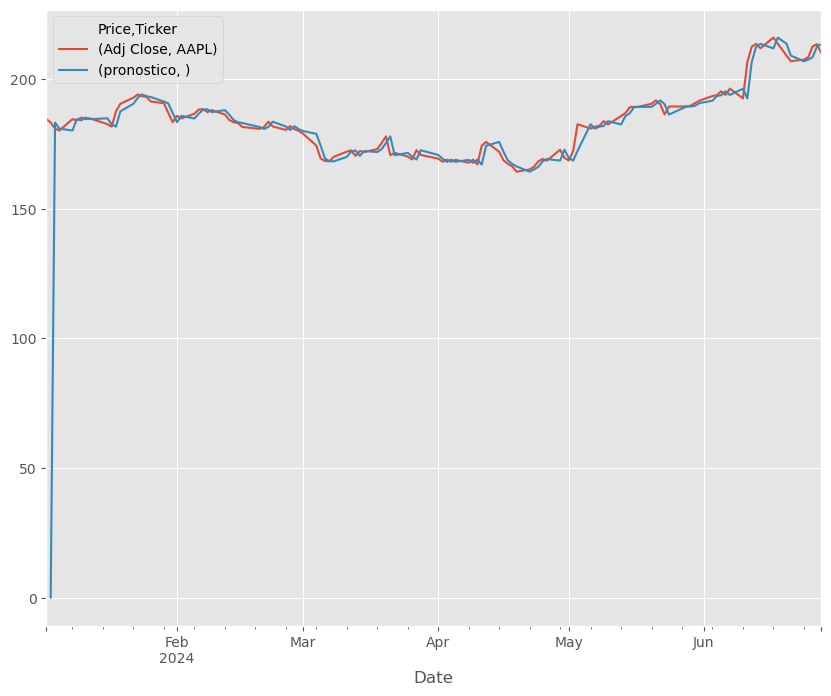

In [42]:
modelo = SARIMAX(apple['Adj Close'].iloc[1:], order=(1,0,0))
resultados = modelo.fit(disp=-1, trend='nc')
apple['pronostico'] = resultados.fittedvalues
plot = apple[['Adj Close', 'pronostico']].plot(figsize=(10, 8));